# Holt-Winters Methods

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.dropna(inplace=True)

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency

In [6]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

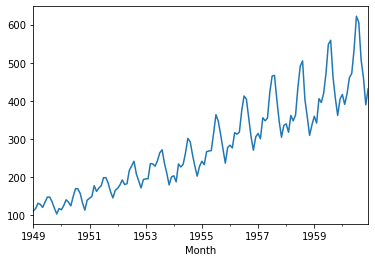

In [8]:
df['Thousands of Passengers'].plot()


___
## Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alpha = 0.15

#df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [10]:
model_ses12=SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,SES12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.900000
1949-03-01,132,115.765000
1949-04-01,129,117.750250
1949-05-01,121,118.237712


___
## Double Exponential Smoothing

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(df['Thousands of Passengers'], trend='add')
fitted_model= mod_add12.fit()
df['DESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,SES12,DESadd12
Month,,,
1949-01-01,112,112.000000,114.726025
1949-02-01,118,112.900000,120.710594
1949-03-01,132,115.765000,134.718413
1949-04-01,129,117.750250,131.778276
1949-05-01,121,118.237712,123.758032


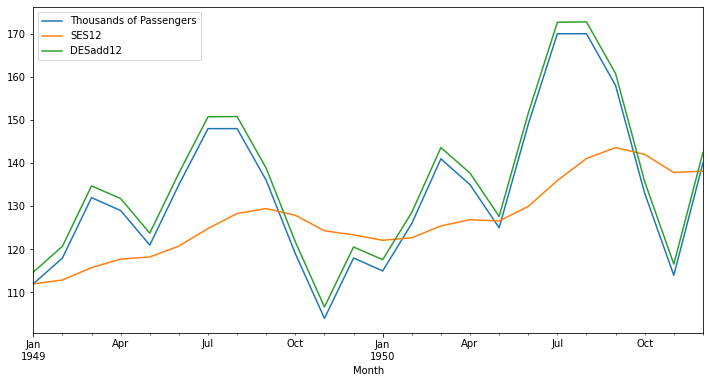

In [12]:
df[['Thousands of Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [13]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,SES12,DESadd12,DESmul12
Month,,,,
1949-01-01,112,112.000000,114.726025,115.382342
1949-02-01,118,112.900000,120.710594,121.618649
1949-03-01,132,115.765000,134.718413,136.321485
1949-04-01,129,117.750250,131.778276,133.114133
1949-05-01,121,118.237712,123.758032,124.581833


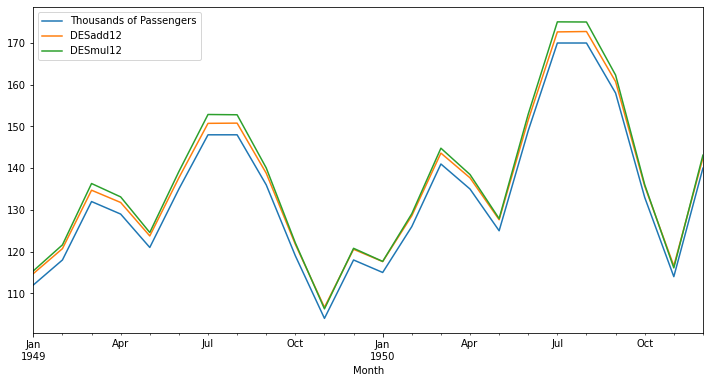

In [14]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

___
## Triple Exponential Smoothing

In [15]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,
1949-01-01,112,112.000000,114.726025,115.382342,112.004219
1949-02-01,118,112.900000,120.710594,121.618649,120.168118
1949-03-01,132,115.765000,134.718413,136.321485,134.696863
1949-04-01,129,117.750250,131.778276,133.114133,131.379750
1949-05-01,121,118.237712,123.758032,124.581833,124.631124


In [16]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,
1949-01-01,112,112.000000,114.726025,115.382342,112.004219,111.595038
1949-02-01,118,112.900000,120.710594,121.618649,120.168118,118.842634
1949-03-01,132,115.765000,134.718413,136.321485,134.696863,133.333964
1949-04-01,129,117.750250,131.778276,133.114133,131.379750,127.900174
1949-05-01,121,118.237712,123.758032,124.581833,124.631124,120.978432


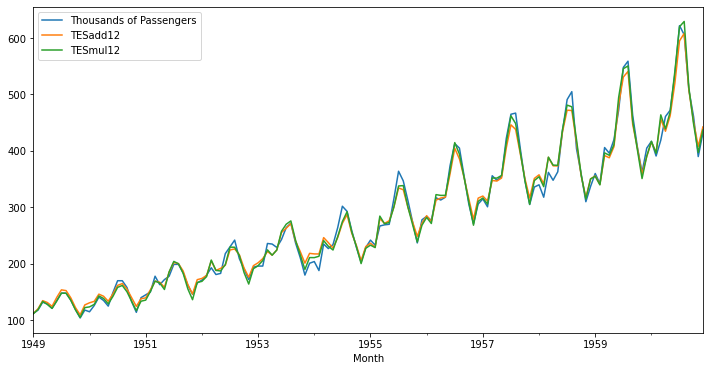

In [17]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

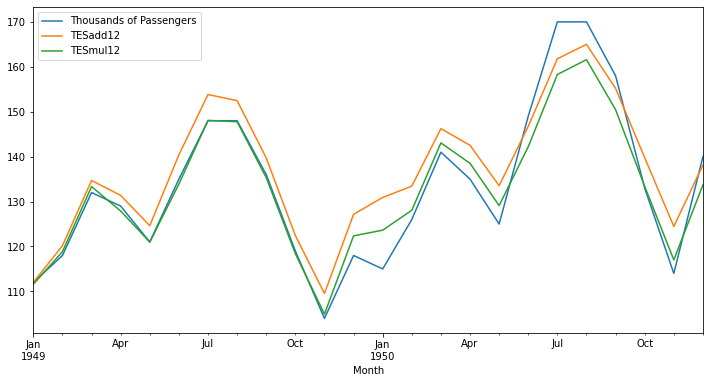

In [18]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);